# Lab6 Vector Analysis I
----------------------------------

## Task 1

Indexing and Selecting data using different methods.

In [1]:
# Import geopandas module
# %matplotlib inline
import geopandas as gpd
%matplotlib inline

# Read build-in dataset using gpd.read_file()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


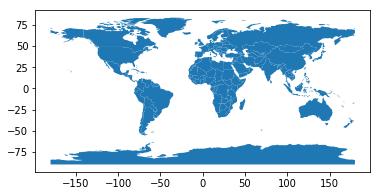

In [2]:
# Have a look at the data
world.plot();
world.head()

In [8]:
#Get the continent and iso_a3 columns using basic indexing []
world[['continent','iso_a3']].head()
#sel_cont_iso

,continent,iso_a3
0,Asia,AFG
1,Africa,AGO
2,Europe,ALB
3,Asia,ARE
4,South America,ARG


In [9]:
#Get all the Asia contries' populations using .loc()
world.loc[world['continent']=='Asia',['pop_est','name']].head()

,pop_est,name
0,28400000.0,Afghanistan
3,4798491.0,United Arab Emirates
5,2967004.0,Armenia
10,8238672.0,Azerbaijan
15,156050883.0,Bangladesh


In [10]:
#Get a matrix (row 3-5, column 2-3) from the Geodataframe using .iloc()
world.iloc[2:5,1:3]

,continent,name
2,Europe,Albania
3,Asia,United Arab Emirates
4,South America,Argentina


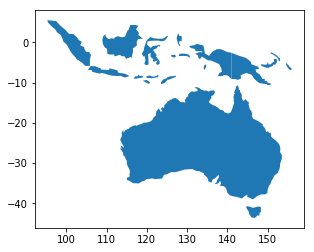

In [11]:
#Get the data based on coordinates range 
#(longitude: 110~155 degree, latitude:-50~0 degree) using .cx()
#then plot the data using .plot()
world.cx[110:155,-50:0].plot()

## Task 2

Attribute join and Spatial Join

In [15]:
# Import necessary modules, e.g geopandas
import geopandas as gpd
# Read files using gpd.read_file(), read two shapefiles in data folder
# nybb.shp and Nursinghomes.shp
nybb = gpd.read_file(r'C:\Users\casca\Downloads\SimpleAccess\Lab6_data\nybb.shp')
nynh = gpd.read_file(r'C:\Users\casca\Downloads\SimpleAccess\Lab6_data\NursinghomesNY.shp')
#nybb
nynh.head()

,Label,City,Zipcode,Borough,geometry
0,BISHOP MUGAVERO,BROOKLYN,11217,3,POINT (987759.2718409449 189445.0476689339)
1,ROBERT MAPPLETHORPE,NEW YORK,10003,1,POINT (989147.0000366122 206680.0000756085)
2,NY CRN,ASTORIA,11102,4,POINT (1004996.000162691 220781.0000887662)
3,ATLANTIS,BROOKLYN,11201,3,POINT (990371.9998831898 191506.999909848)
4,BISHOP HUCLES,BROOKLYN,11233,3,POINT (1004838.000150606 186502.0000773519)


In [16]:
# data preparation: remove the geometry column of nybb
nybb_noGeo = nybb[['BoroCode', 'BoroName', 'Shape_Area']]
nybb_noGeo

,BoroCode,BoroName,Shape_Area
0,5,Staten Island,1.623847e+09
1,1,Manhattan,6.363978e+08
2,2,Bronx,1.186824e+09
3,3,Brooklyn,1.937844e+09
4,4,Queens,3.048479e+09


In [17]:
# Join the table nybb_noGeo (right table) to table nynh (left table) 
# based on a shared column 'BoroCode' in nybb_noGeo, Borough' in nynh, 
# using LEFT.merge(RIGHT,left_on = '?',right_on='?') function.
nynh_withboroinfo = nynh.merge(nybb_noGeo, left_on = 'Borough', right_on = 'BoroCode')
nynh_withboroinfo.head()

,Label,City,Zipcode,Borough,geometry,BoroCode,BoroName,Shape_Area
0,BISHOP MUGAVERO,BROOKLYN,11217,3,POINT (987759.2718409449 189445.0476689339),3,Brooklyn,1.937844e+09
1,ATLANTIS,BROOKLYN,11201,3,POINT (990371.9998831898 191506.999909848),3,Brooklyn,1.937844e+09
2,BISHOP HUCLES,BROOKLYN,11233,3,POINT (1004838.000150606 186502.0000773519),3,Brooklyn,1.937844e+09
3,BROOKLYN METHODIST,BROOKLYN,11208,3,POINT (1022206.99986136 183968.9998940229),3,Brooklyn,1.937844e+09
4,BROOKLYN-QUEENS,BROOKLYN,11208,3,POINT (1022401.000129521 183406.0000357628),3,Brooklyn,1.937844e+09


In [19]:
# if the nynh data does not have the borough id column, 
# then we cannot use the attribute join, instead, we need to use the spatial join

# data preparation: remove the Borough column of nynh
nynh_noBoro = nynh.iloc[:,[0,1,2,4]]
nynh_noBoro

,Label,City,Zipcode,geometry
0,BISHOP MUGAVERO,BROOKLYN,11217,POINT (987759.2718409449 189445.0476689339)
1,ROBERT MAPPLETHORPE,NEW YORK,10003,POINT (989147.0000366122 206680.0000756085)
2,NY CRN,ASTORIA,11102,POINT (1004996.000162691 220781.0000887662)
3,ATLANTIS,BROOKLYN,11201,POINT (990371.9998831898 191506.999909848)
4,BISHOP HUCLES,BROOKLYN,11233,POINT (1004838.000150606 186502.0000773519)
5,BROOKLYN METHODIST,BROOKLYN,11208,POINT (1022206.99986136 183968.9998940229)
6,BROOKLYN-QUEENS,BROOKLYN,11208,POINT (1022401.000129521 183406.0000357628)
7,BUENA VIDA,BROOKLYN,11221,POINT (1004324.767581269 193121.0678759366)
8,CABS,BROOKLYN,11205,POINT (997480.0001028627 190986.9999656081)
9,CATON PARK,BROOKLYN,11226,POINT (993319.9998926967 175910.9999339432)


In [21]:
# Spatial join the nynh_noBoro and nybb based on spatial relationship 'within' 
# so in the output, each nursing home's will have the corresponding borough information
# hint: use gpd.sjoin(left_df, right_df, how='?', op='?')
nynh_with_Boro = gpd.sjoin(nynh_noBoro, nybb, how='inner', op='within')
nynh_with_Boro.head()

,Label,City,Zipcode,geometry,index_right,BoroCode,BoroName,Shape_Leng,Shape_Area
0,BISHOP MUGAVERO,BROOKLYN,11217,POINT (987759.2718409449 189445.0476689339),3,3,Brooklyn,742297.830402,1.937844e+09
3,ATLANTIS,BROOKLYN,11201,POINT (990371.9998831898 191506.999909848),3,3,Brooklyn,742297.830402,1.937844e+09
4,BISHOP HUCLES,BROOKLYN,11233,POINT (1004838.000150606 186502.0000773519),3,3,Brooklyn,742297.830402,1.937844e+09
5,BROOKLYN METHODIST,BROOKLYN,11208,POINT (1022206.99986136 183968.9998940229),3,3,Brooklyn,742297.830402,1.937844e+09
6,BROOKLYN-QUEENS,BROOKLYN,11208,POINT (1022401.000129521 183406.0000357628),3,3,Brooklyn,742297.830402,1.937844e+09


## Task 3

Create static maps with GeoDataFrame

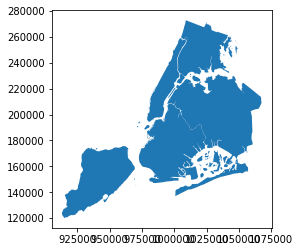

In [22]:
# directly plot nybb using .plot()
nybb.plot()

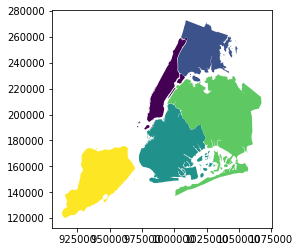

In [23]:
# create choropleth map of nybb using column 'BoroCode'
nybb.plot(column = 'BoroCode')

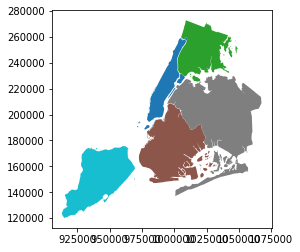

In [24]:
# change colormap to "tab10" see https://matplotlib.org/users/colormaps.html
nybb.plot(column = 'BoroCode',cmap = 'tab10')

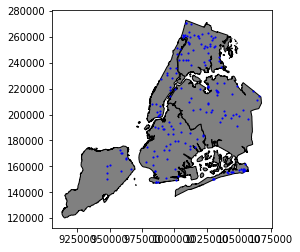

In [25]:
# plot both nybb and nynh on the same map
# for nybb, use grey color, black edge
# for nynh, use blue dot marker, size = 5
# see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
base=nybb.plot(color='grey', edgecolor='black')
nynh.plot(ax=base,color='blue', marker = '.', markersize=5)
